In [4]:
using Revise
using SSMCMain, SSMCMain.ModifiedMiCRM, MLSolver

Precompiling packages...
  11629.9 ms  ✓ SSMCMain
  1 dependency successfully precompiled in 13 seconds. 472 already precompiled.


In [5]:
using CairoMakie, ProgressLogging

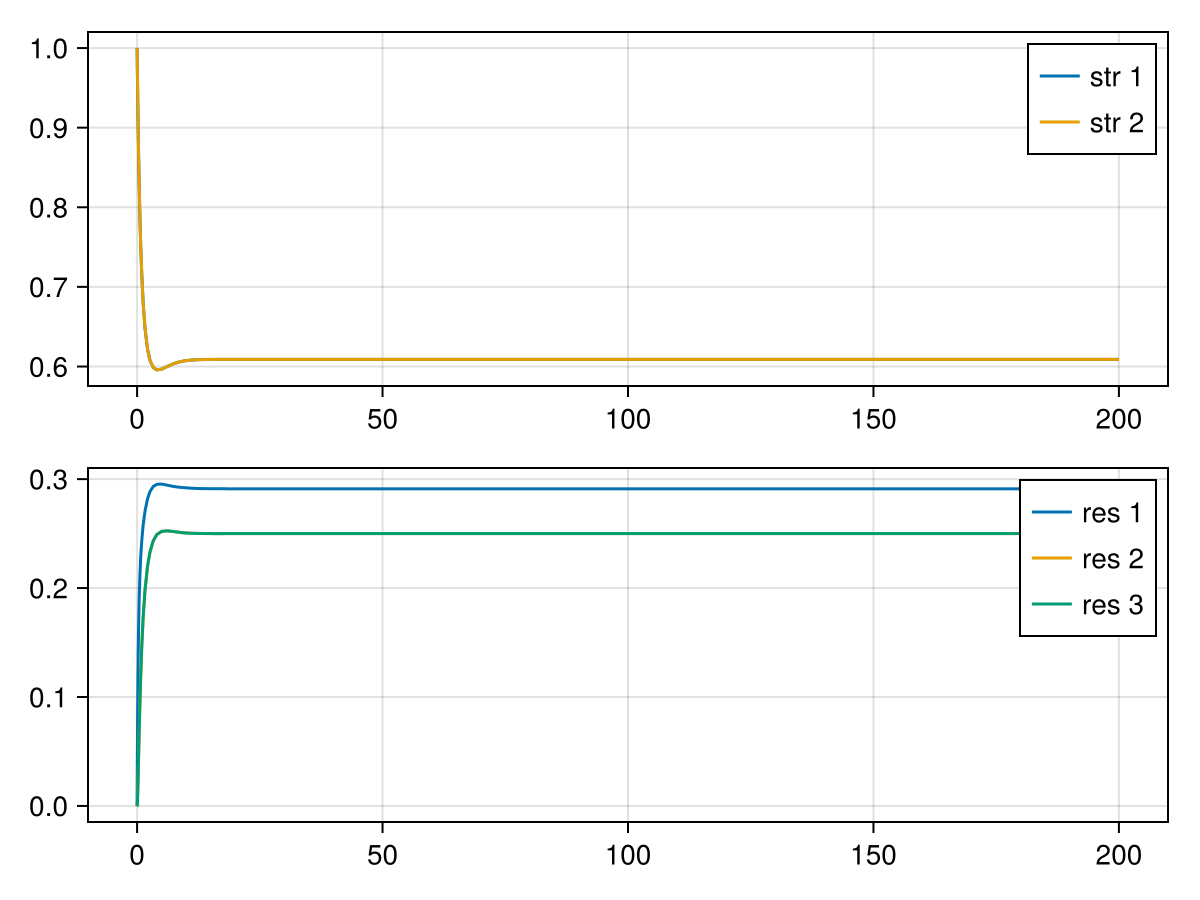

[0.608945417108401, 0.608945417108401, 0.2910545828213568, 0.2500000000941334, 0.2500000000941334]

In [113]:
D = fill(0., 2, 3, 3)
D[1,:,:] .= [0. 0. 0.; 0. 0. 0.; 1 0. 0.]
D[2,:,:] .= [0. 0. 0.; 1. 0. 0.; 0. 0. 0.]
p, s = make_solve_plot_return(2,3,200;
    D=SArray{Tuple{2,3,3}}(D),
    K=[1., 0., 0.],
    r=[1., 0.2, 0.2],
    l=[1. 0. 0.; 1. 0. 0.],
    c=[2. 2. 0.; 2. 0. 2.],
    m=[0.5, 0.5],
    u0=[1., 1., 0., 0., 0.],
    u0rand=0.
)
# display(p.p.c)
# display(p.p.D[1,:,:])
# display(p.p.D[2,:,:])
show(s.u[end])
# param_summary(p.p)

In [114]:
symsol = symbolic_solve_ode_ml(p)

┌ Warning: Solve::ratnz: Solve was unable to solve the system with inexact coefficients.
│     The answer was obtained by solving a corresponding exact system and
│     numericizing the result.
└ @ MathLink ~/.julia/packages/MathLink/S39uA/src/eval.jl:16


5-element Vector{Vector{Pair{Symbolics.Num, Symbolics.Num}}}:
 [u1 => 0.6089454172900137, u2 => 0.6089454172900137, u3 => 0.2910545827099863, u4 => 0.25, u5 => 0.25]
 [u1 => 0.04105458270998632, u2 => 0.04105458270998632, u3 => 0.8589454172900137, u4 => 0.25, u5 => 0.25]
 [u1 => 0.0, u2 => 0.0, u3 => 1.0, u4 => 0.0, u5 => 0.0]
 [u1 => 0.0, u2 => -0.1, u3 => 1.25, u4 => -1.25, u5 => 0.25]
 [u1 => -0.1, u2 => 0.0, u3 => 1.25, u4 => 0.25, u5 => -1.25]

In [115]:
sssol = solve(SteadyStateProblem(p), DynamicSS())
show(sssol)

[0.6089451578127569, 0.6089451578127569, 0.2910548386568454, 0.25000013479224453, 0.25000013479224453]

In [116]:
ks = LinRange(0., 10., 10000)
Ds = [0.1, 0.1, 1e4, 10., 10.]
usol = sssol.u
#usol = Symbolics.value.(getindex.(symsol[2], 2))
show(uninplace(mmicrmfunc!)(sssol.u, p.p, 0))

[1.6416216923782836e-7, 1.6416216923782836e-7, -5.772890823152466e-7, 9.928912181322858e-8, 9.928912181322858e-8]

maximum(real(lambdas)) = 0.05324698827645839


[ Info: we are getting non-zero imaginary parts, max(abs(.)) is 0.130105
[ Info: we are getting non-zero imaginary parts, max(abs(.)) is 0.902871
[ Info: we are getting non-zero imaginary parts, max(abs(.)) is 0.902933
[ Info: we are getting non-zero imaginary parts, max(abs(.)) is 0.902933


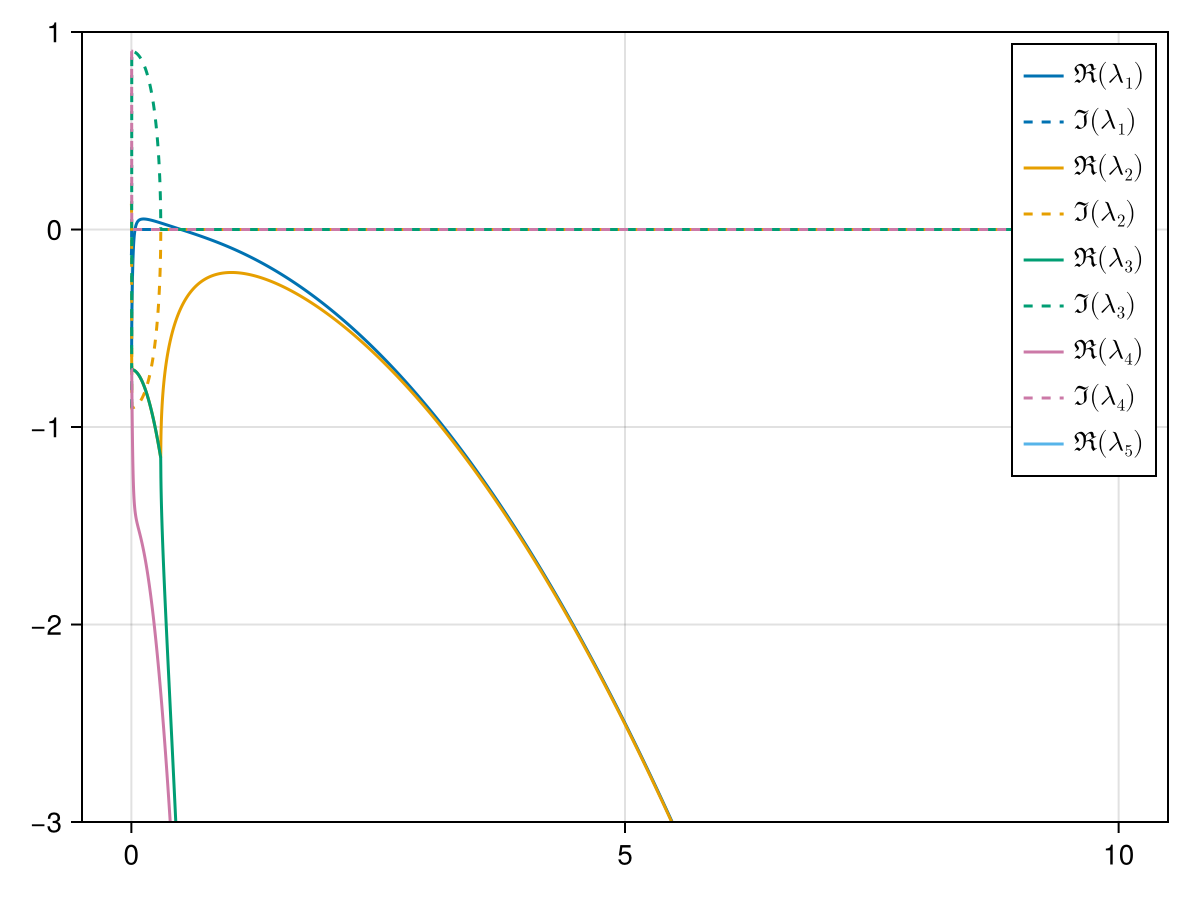

In [117]:
lambdas = do_linstab_for_ks(ks, p, Ds, usol);
@show maximum(real(lambdas))
faa = plot_linstab_lambdas(ks, lambdas[:,:])
ylims!(faa.axis, (-3., 1.))
#xlims!(faa.axis, (0., 2.))
faa

In [93]:
ff = linstab_make_full_func(p.p, usol, Ds)
kmax_i = argmax(maximum.(eachrow(real(lambdas))))
kmax = ks[kmax_i]
kmax_i, kmax

(1350, 1.349134913491349)

In [19]:
kmax_es = ff(kmax);
kmax_es.vectors[:,1]

5-element Vector{ComplexF64}:
  -0.03993982680735873 + 0.0im
 -0.039939826807358816 + 0.0im
  0.040971082549015964 + 0.0im
    -0.705383225936073 + 0.0im
   -0.7053832259360702 + 0.0im